# <center>  Detect hand-written digits with logistic regression and explore gradient descent </center>

In [1]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
import pandas as pd

# Import some data
digits = load_digits()
# Show dimensionality
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [2]:
print(digits.data.shape)
print(digits.target.shape)

print(digits.keys())
#print(digits.DESCR)

print('le type de digits est',type(digits))
print('le type de digits.data est', type(digits.data))
print('le type de digits.target est',type(digits.target))
print('le type de digits.frame est',type(digits.frame))
print('le type de digits.feature_names est',type(digits.feature_names))
print('le type de digits.target_names est',type(digits.target_names))
print('le type de digits.images est',type(digits.images))
print('le type de digits.DESCR est',type(digits.DESCR))

(1797, 64)
(1797,)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
le type de digits est <class 'sklearn.utils.Bunch'>
le type de digits.data est <class 'numpy.ndarray'>
le type de digits.target est <class 'numpy.ndarray'>
le type de digits.frame est <class 'NoneType'>
le type de digits.feature_names est <class 'list'>
le type de digits.target_names est <class 'numpy.ndarray'>
le type de digits.images est <class 'numpy.ndarray'>
le type de digits.DESCR est <class 'str'>


Pour faire la regression on peut travailler par exemple sur les (digits.data et digits.target) ou bien (digits.target_names et digits.images)

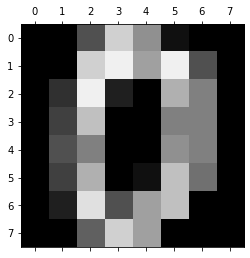

In [3]:
# Show one data
#fig=plt.gray()
#plt.gray() 
plt.matshow(digits.images[0],cmap='gray',vmin=0, vmax=16) 
plt.show()
plt.close()

In [4]:
# #Show one data

#plt.gray() 
#plt.matshow(digits.images[0]) 
#plt.show()
#plt.close()

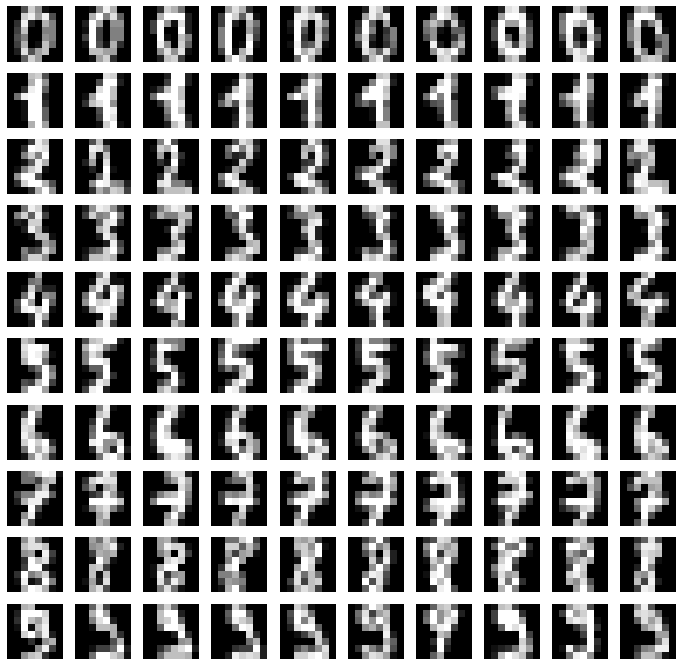

In [5]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target

n_digits = np.unique(Y)
M = 10
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j],cmap='gray',vmin=0, vmax=16)
        axs[i,j].axis('off')

# Train-Test Split Procedure in Scikit-Learn

In [6]:
from sklearn.model_selection import train_test_split
X=digits.data
Y=digits.target
# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1203, 64) (594, 64) (1203,) (594,)


In [7]:
# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train[:1, :])
# split again, and we should see the same split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train[:1, :])

[[ 0.  0.  0.  0.  5. 15.  8.  0.  0.  0.  0.  2. 15. 16.  9.  0.  0.  0.
   3. 15. 16. 16. 10.  0.  0.  7. 16. 10.  8. 16.  7.  0.  0.  0.  1.  0.
   8. 16.  4.  0.  0.  0.  0.  0. 11. 16.  1.  0.  0.  0.  0.  0.  9. 16.
   1.  0.  0.  0.  0.  0.  8. 14.  0.  0.]]
[[ 0.  0.  0.  0.  5. 15.  8.  0.  0.  0.  0.  2. 15. 16.  9.  0.  0.  0.
   3. 15. 16. 16. 10.  0.  0.  7. 16. 10.  8. 16.  7.  0.  0.  0.  1.  0.
   8. 16.  4.  0.  0.  0.  0.  0. 11. 16.  1.  0.  0.  0.  0.  0.  9. 16.
   1.  0.  0.  0.  0.  0.  8. 14.  0.  0.]]


In [8]:
from collections import Counter
print(Counter(Y))
# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=1)
print(Counter(Y_train))
print(Counter(Y_test))

Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})
Counter({5: 101, 0: 95, 6: 93, 8: 93, 2: 92, 7: 90, 1: 89, 3: 85, 4: 81, 9: 79})
Counter({9: 101, 4: 100, 3: 98, 1: 93, 7: 89, 6: 88, 2: 85, 0: 83, 5: 81, 8: 81})


In [9]:
# split into train test sets with stratify
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=1, stratify=Y)
print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_test))

Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})
Counter({3: 91, 1: 91, 5: 91, 7: 90, 4: 90, 6: 90, 9: 90, 0: 89, 2: 89, 8: 87})
Counter({3: 92, 1: 91, 6: 91, 5: 91, 4: 91, 9: 90, 7: 89, 0: 89, 2: 88, 8: 87})


# 3) Predict Digits

## 3.1) Prediction of one digit

In [10]:

import copy
X=copy.copy(digits.data)
Y=copy.copy(digits.target)
print(Y)
Y7=copy.copy(digits.target)
Y7[Y7!=7]=0
print(Y7[0:20,])
print(Y7.shape)
Y7[Y7==7]=1

print(Y7[0:20,])
print(Y[0:20,])
print(digits.target[0:20,])
print(Y7.shape)

[0 1 2 ... 8 9 8]
[0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 7 0 0]
(1797,)
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
(1797,)


### 3.1.1) split into train test sets+ stratify parameter
X7_train, X7_test, Y7_train, Y7_test = train_test_split(X, Y7, test_size=0.2, random_state=1, stratify=Y7)

In [11]:
# vérification de l'équidécoupage
print(Counter(Y7))
print(Counter(Y7_train))
print(Counter(Y7_test))

Counter({0: 1618, 1: 179})


NameError: name 'Y7_train' is not defined

### 3.1.2) First Method with the LogisticRegression() Function

In [ ]:
from sklearn.linear_model import LogisticRegression
clr7 = LogisticRegression(max_iter=1000)# the maximum of ietration to train is very important 
clr7.fit(X7_train, Y7_train)
clr71=clr7.score(X7_test, Y7_test)
clr72=clr7.score(X7_train, Y7_train)
clr73=clr7.score(X, Y)

print(clr71,clr72,clr73)
# the score is in general computed with respect th test set

In [ ]:
# the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
conf7 = confusion_matrix(Y7_test, clr7.predict(X7_test))
conf7




In [ ]:
# the prediction if the 42 element is 7 (1) or not (0)
digits.data[41].shape
digits.data[41]
clr7.predict(X[7].reshape(-1,64))

In [ ]:
# plot an show of the 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf7)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf7[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
## rapport de la régression

report7 = classification_report(Y7_test, clr7.predict(X7_test))
print('Le rapport de classification du chiffre 7:', report7, sep='\n')

### 3.1.3) Second Method with the SGDClassifier() Function

In [ ]:
# Use of the stochastic descent gradient function of Sklearn
# SGDClassifier with the loss function is 'log' for logistic problems
from sklearn.linear_model import SGDClassifier 
clrs7 = SGDClassifier(max_iter=100, eta0=0.01, loss='log', verbose=1)

clrs7.fit(X7_train, Y7_train)

clrs71=clrs7.score(X7_test, Y7_test)
clrs72=clrs7.score(X7_train, Y7_train)
clrs73=clrs7.score(X, Y)

print(clrs71,clrs72,clrs73) 

In [ ]:
# Use of the stochastic descent gradient function of Sklearn
# SGDClassifier with the loss function is 'log' for logistic problems
# plot of the loss in function of epochs

import sys
from io import StringIO
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
from sklearn.linear_model import SGDClassifier 
clrs7 = SGDClassifier(max_iter=100, eta0=0.01, loss='log', verbose=1)
clrs7.fit(X7_train, Y7_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
#plt.savefig("warmstart_plots/pure_SGD:"+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [ ]:
min(loss_list)

## 3.1) Prediction of any digit

In [ ]:
# Multiclass logistic regression
X=copy.copy(digits.data)
Y=copy.copy(digits.target)
print(X)
print(Y)
# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)
print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_test))

In [ ]:
clr = LogisticRegression(max_iter=20000,multi_class='multinomial')
clr.fit(X_train, Y_train)
clr1=clr.score(X_test, Y_test)
clr2=clr.score(X_train, Y_train)
clr3=clr.score(X, Y)

print(clr1,clr2,clr3)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf= confusion_matrix(Y_test, clr.predict(X_test))
conf

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=14, color='black')
ax.set_ylabel('Actual outputs', fontsize=14, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, conf[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
# rapport de la régression

report = classification_report(Y_test, clr.predict(X_test))
print('Le rapport de classification :', report, sep='\n')